#### Step 1: Load the data...

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df=pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\DataSets\archive\twitter_training.csv")
val_df=pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\DataSets\archive\twitter_validation.csv")

In [3]:
train_df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [4]:
val_df.head()

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [5]:
# Renaming column names both training validation data sets
train_df.columns = ['id', 'entity', 'sentiment', 'text']
val_df.columns = ['id', 'entity', 'sentiment', 'text']

In [6]:
train_df.head()

,id,entity,sentiment,text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [7]:
val_df.head()

,id,entity,sentiment,text
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


##### Step 2: Incpect the data...

In [8]:
# Check for missing values and data types in the training dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         74681 non-null  int64 
 1   entity     74681 non-null  object
 2   sentiment  74681 non-null  object
 3   text       73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [9]:
# Check for missing values and data types in the validation dataset
val_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         999 non-null    int64 
 1   entity     999 non-null    object
 2   sentiment  999 non-null    object
 3   text       999 non-null    object
dtypes: int64(1), object(3)
memory usage: 31.3+ KB


In [10]:
# Summary statistics for the training dataset
train_df.describe(include='all')

,id,entity,sentiment,text
count,74681.000000,74681,74681,73995
unique,NaN,32,4,69490
top,NaN,TomClancysRainbowSix,Negative,
freq,NaN,2400,22542,172
mean,6432.640149,NaN,NaN,NaN
std,3740.423819,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN
25%,3195.000000,NaN,NaN,NaN
50%,6422.000000,NaN,NaN,NaN
75%,9601.000000,NaN,NaN,NaN


In [11]:
# Summary statistics for the validation dataset
val_df.describe(include='all')

,id,entity,sentiment,text
count,999.000000,999,999,999
unique,NaN,32,4,998
top,NaN,RedDeadRedemption(RDR),Neutral,Wow
freq,NaN,40,285,2
mean,6435.159159,NaN,NaN,NaN
std,3728.912226,NaN,NaN,NaN
min,6.000000,NaN,NaN,NaN
25%,3241.500000,NaN,NaN,NaN
50%,6560.000000,NaN,NaN,NaN
75%,9662.500000,NaN,NaN,NaN


##### Step 3: Preproces the data...
We'll clean the text data and handle any missing values if necessary.

In [12]:
import re
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already downloaded
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
# Define a function to clean the text using Natural Language Procesing(NLP) techniques
def clean_text(text):
    if not isinstance(text, str):
        return ""
    
    text = re.sub(r'http\S+', '', text)                # Remove URLs
    text = re.sub(r'@\w+|#', '', text)                 # Remove mentions and hashtags
    text = re.sub(r'[^A-Za-z\s]', '', text)            # Remove special characters and numbers
    text = text.lower()                                # Convert uppercase to lowercase
    stop_words = set(stopwords.words('english'))       # Remove stopwords
    
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

# Apply the cleaning function to the text column in both datasets
train_df['clean_text'] = train_df['text'].apply(clean_text)
val_df['clean_text'] = val_df['text'].apply(clean_text)

train_df[['text', 'clean_text']].head()


,text,clean_text
0,I am coming to the borders and I will kill you...,coming borders kill
1,im getting on borderlands and i will kill you ...,im getting borderlands kill
2,im coming on borderlands and i will murder you...,im coming borderlands murder
3,im getting on borderlands 2 and i will murder ...,im getting borderlands murder
4,im getting into borderlands and i can murder y...,im getting borderlands murder


In [14]:
val_df[['text', 'clean_text']].head()

,text,clean_text
0,BBC News - Amazon boss Jeff Bezos rejects clai...,bbc news amazon boss jeff bezos rejects claims...
1,@Microsoft Why do I pay for WORD when it funct...,pay word functions poorly chromebook
2,"CSGO matchmaking is so full of closet hacking,...",csgo matchmaking full closet hacking truly awf...
3,Now the President is slapping Americans in the...,president slapping americans face really commi...
4,Hi @EAHelp I’ve had Madeleine McCann in my cel...,hi ive madeleine mccann cellar past years litt...


##### Step 3: Sentiment Analysis...
We'll use a pre-trained model or library for sentiment analysis. Here, we'll use the VADER sentiment analyzer from the nltk library.

In [15]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

# Define a function to get the sentiment score
def get_sentiment(text):
    scores = sid.polarity_scores(text)
    return scores['compound']

train_df['sentiment_score'] = train_df['clean_text'].apply(get_sentiment)
val_df['sentiment_score'] = val_df['clean_text'].apply(get_sentiment)

# Categorize sentiment into positive, negative, and neutral in both datasets
train_df['sentiment_category'] = train_df['sentiment_score'].apply(lambda x: 'positive' if x > 0.05 else 
                                                                   ('negative' if x < -0.05 else 'neutral'))
val_df['sentiment_category'] = val_df['sentiment_score'].apply(lambda x: 'positive' if x > 0.05 else 
                                                               ('negative' if x < -0.05 else 'neutral'))

print("Training Data with Sentiment Scores:")
train_df[['text', 'clean_text', 'sentiment_score', 'sentiment_category']].head()


Training Data with Sentiment Scores:


,text,clean_text,sentiment_score,sentiment_category
0,I am coming to the borders and I will kill you...,coming borders kill,-0.6908,negative
1,im getting on borderlands and i will kill you ...,im getting borderlands kill,-0.6908,negative
2,im coming on borderlands and i will murder you...,im coming borderlands murder,-0.6908,negative
3,im getting on borderlands 2 and i will murder ...,im getting borderlands murder,-0.6908,negative
4,im getting into borderlands and i can murder y...,im getting borderlands murder,-0.6908,negative


In [16]:
print("\nValidation Data with Sentiment Scores:")
val_df[['text', 'clean_text', 'sentiment_score', 'sentiment_category']].head()



Validation Data with Sentiment Scores:


,text,clean_text,sentiment_score,sentiment_category
0,BBC News - Amazon boss Jeff Bezos rejects clai...,bbc news amazon boss jeff bezos rejects claims...,-0.0000,neutral
1,@Microsoft Why do I pay for WORD when it funct...,pay word functions poorly chromebook,-0.1027,negative
2,"CSGO matchmaking is so full of closet hacking,...",csgo matchmaking full closet hacking truly awf...,-0.0258,neutral
3,Now the President is slapping Americans in the...,president slapping americans face really commi...,0.3597,positive
4,Hi @EAHelp I’ve had Madeleine McCann in my cel...,hi ive madeleine mccann cellar past years litt...,-0.4116,negative


##### Step 4: Visualization...
We'll visualize the sentiment distribution and the sentiment patterns over time

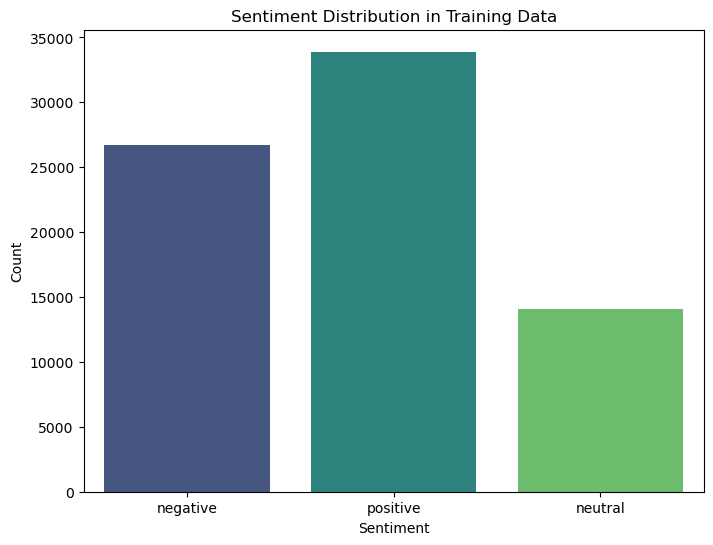

Number of positive: 33898
Number of negative: 26724
Number of neutral: 14059


In [17]:
# Sentiment distribution in the training dataset
plt.figure(figsize=(8, 6))
sentiment_count = train_df['sentiment_category'].value_counts()

sns.countplot(data=train_df, x='sentiment_category', palette='viridis')
plt.title('Sentiment Distribution in Training Data')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

print(f"Number of positive: {sentiment_count['positive']}")
print(f"Number of negative: {sentiment_count['negative']}")
print(f"Number of neutral: {sentiment_count['neutral']}")

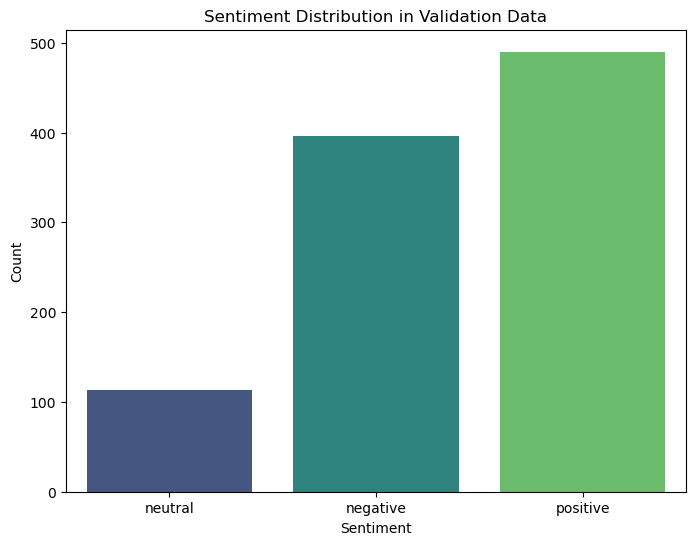

Number of positive: 490
Number of negative: 396
Number of neutral: 113


In [18]:
# Sentiment distribution in the validation dataset
plt.figure(figsize=(8, 6))
sentiment_count = val_df['sentiment_category'].value_counts()

sns.countplot(data=val_df, x='sentiment_category', palette='viridis')
plt.title('Sentiment Distribution in Validation Data')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

print(f"Number of positive: {sentiment_count['positive']}")
print(f"Number of negative: {sentiment_count['negative']}")
print(f"Number of neutral: {sentiment_count['neutral']}")

In [19]:
# Training data set
entity_sentiment = train_df.groupby('entity')['sentiment_score'].mean().reset_index()

entity_sentiment['sentiment_category'] = entity_sentiment['sentiment_score'].apply(lambda x: 'positive' if x > 0.05 else
                                                                                   ('negative' if x < -0.05 else 'neutral'))



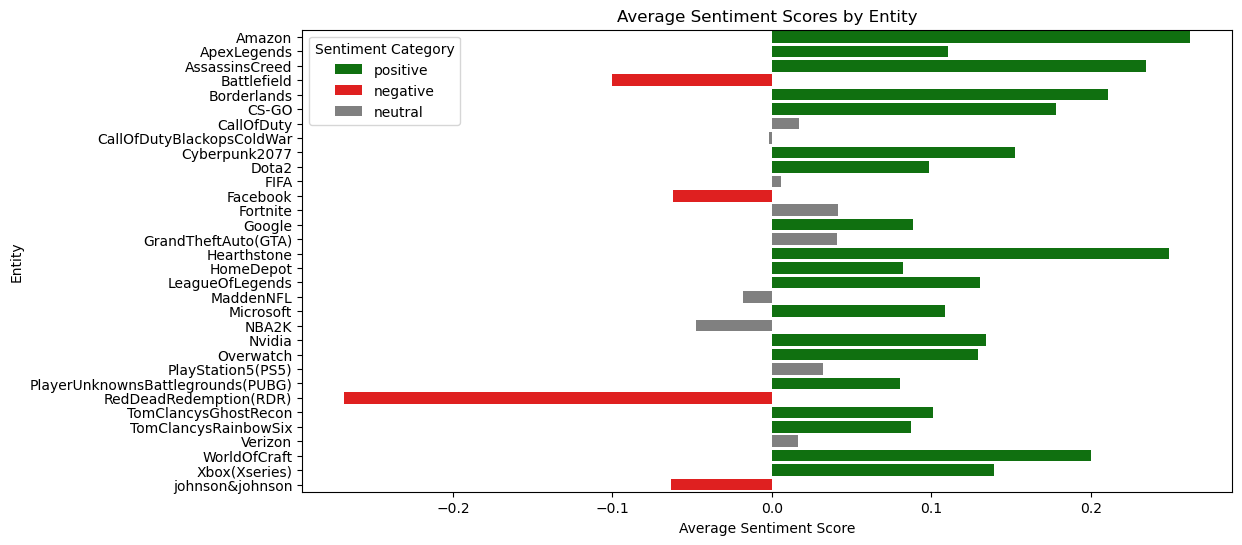

In [20]:
# Bar plot of average sentiment scores for each entity using training data

palette = {'positive': 'green', 'neutral': 'gray', 'negative': 'red'}

plt.figure(figsize=(12, 6))
sns.barplot(data=entity_sentiment, x='sentiment_score', y='entity', hue='sentiment_category', dodge=False, palette=palette)
plt.title('Average Sentiment Scores by Entity')
plt.xlabel('Average Sentiment Score')
plt.ylabel('Entity')
plt.legend(title='Sentiment Category')
plt.show()


In [21]:
# Specifing the average sentiment scores for each entity using training data

entity_sentiment_counts = train_df.groupby(['entity', 'sentiment_category']).size().unstack(fill_value=0)

entity_sentiment_counts = entity_sentiment_counts.reset_index()                  # Reset the index for plotting
entity_sentiment_counts.head()

sentiment_category,entity,negative,neutral,positive
0,Amazon,636,261,1419
1,ApexLegends,761,507,1108
2,AssassinsCreed,517,399,1328
3,Battlefield,1149,303,894
4,Borderlands,605,385,1295


In [22]:
# Validation data set
entity_sentiment_ = val_df.groupby('entity')['sentiment_score'].mean().reset_index()

entity_sentiment_['sentiment_category'] = entity_sentiment['sentiment_score'].apply(lambda x: 'positive' if x > 0.05 else
                                                                                   ('negative' if x < -0.05 else 'neutral'))


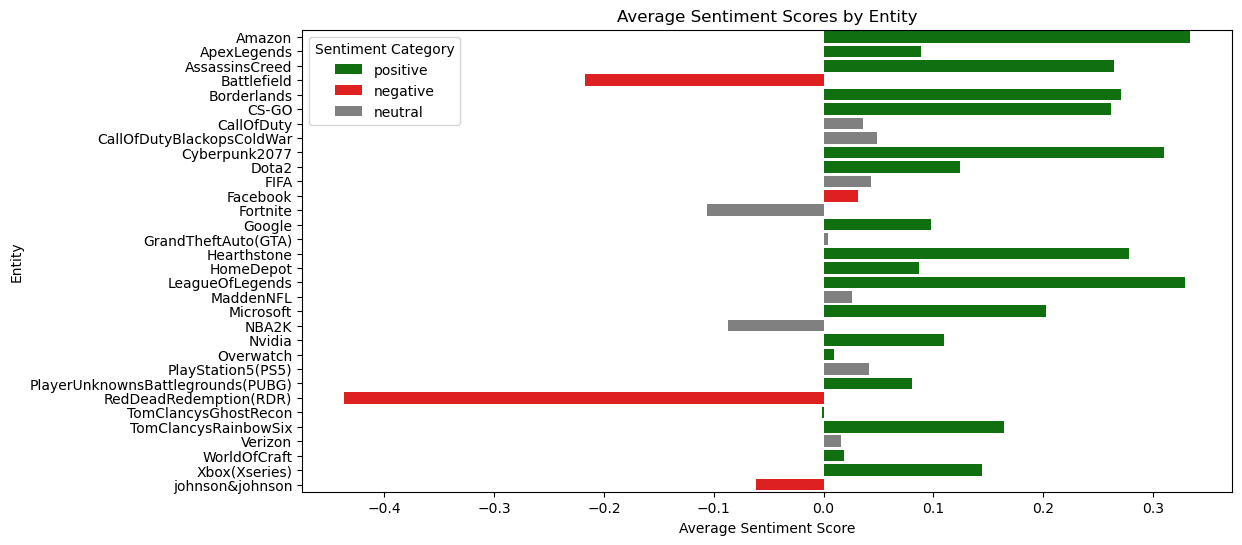

In [23]:
# Bar plot of average sentiment scores for each entity using validation data

palette = {'positive': 'green', 'neutral': 'gray', 'negative': 'red'}

plt.figure(figsize=(12, 6))
sns.barplot(data=entity_sentiment_, x='sentiment_score', y='entity', hue='sentiment_category', dodge=False, palette=palette)
plt.title('Average Sentiment Scores by Entity')
plt.xlabel('Average Sentiment Score')
plt.ylabel('Entity')
plt.legend(title='Sentiment Category')
plt.show()

In [24]:
# Specifing the average sentiment scores for each entity using validation data

entity_sentiment_counts_ = val_df.groupby(['entity', 'sentiment_category']).size().unstack(fill_value=0)

entity_sentiment_counts_ = entity_sentiment_counts_.reset_index()                  # Reset the index for plotting
entity_sentiment_counts_.head()

sentiment_category,entity,negative,neutral,positive
0,Amazon,9,1,24
1,ApexLegends,11,8,17
2,AssassinsCreed,6,7,20
3,Battlefield,17,1,8
4,Borderlands,10,0,23
